### ML estimation of the mean $ \mu $ and the variance $ \Sigma $ of a P-dimension Gaussian process

Consider the Maximum likelihood estimation of the mean vector $\mu_y$ and the covariance matrix $\Sigma_{yy}$ of a P-dimensional Gaussian vector process $y(m)$ from N observation vectors $[y(0), y(1), ... , y(N − 1)]$ .

* Step1.
With the assumption that observation vectors are  **uncorrelated** and **independent**, the joint probability distribution can be expressed as the product of individual probability distributions. We can get the pdf of the observation sequence and translate it into the log-likelihood equation. The equation can be easily written: $$ f_Y (y(0), ··· , y(N − 1)) = \prod_{m=0}^{N-1} f_Y (y(m)) $$. 

* Step 2. 
Because y follows a P-dimensional Gaussian distribution, the expression can be expanded as follows:
$$ f_Y (y(m)) = \frac{1}{(2\pi)^{P/2}|\mathbf{\Sigma}_{yy}|^{1/2}}\exp\left(-\frac{1}{2}(y(m)-\mathbf{\mu})^T\mathbf{\Sigma}_{yy}^{-1}(y(m)-\mathbf{\mu})\right) $$ 

* Step 3. 
So $ f_Y (y(0), ··· , y(N − 1)) $ can be written in the following form:

$$ f_Y (y(0), ··· , y(N − 1)) = \prod_{m=0}^{N-1} f_Y (y(m))=\prod_{m=0}^{N-1} \frac{1}{(2\pi)^{P/2}|\mathbf{\Sigma}_{yy}|^{1/2}}\exp\left(-\frac{1}{2}(y(m)-\mathbf{\mu})^T\mathbf{\Sigma}_{yy}^{-1}(y(m)-\mathbf{\mu})\right) $$

* Step 4.
Taking the derivative of the log-likelihood equation with respect to the mean vector. Set the derivative equation to 0 and solve to obtain the Mean vector at that point. Skipping the derivation process, we finally obtain the ML estimate of the mean vector $\hat{\mu}_y $,   $$\hat{\mu}_y =\frac{1}{N} \sum_{m=0}^{N-1}y(m)$$

* Step 5.
Taking the derivative of the log-likelihood equation with respect to the covariance matrix. Set the derivative equation to 0 and solve to obtain the covariance matrix at that point.Skipping the derivation process, we finally obtain the ML estimate of the covariance matrix $ \hat{\mathbf{\Sigma}}_{yy}$,  $$ \hat{\mathbf{\Sigma}}_{yy} = \frac{1}{N} \sum_{i=1}^{N} (y(m) - \hat{\mathbf{\mu}_y}) (y(m) - \hat{\mathbf{\mu}_y})^T $$

In [8]:
import numpy as np

def generate_covariance_matrix(P, upper_bound):
    """
    Generate a random positive definite covariance matrix for P-dimensional data.

    Parameters:
        P (int): Dimensionality of the covariance matrix.

    Returns:
        ndarray: P*P covariance matrix.

    Example usage:
        P = 3  # Dimensionality of the covariance matrix
        cov_matrix = generate_covariance_matrix(P)
        print(cov_matrix)
    """
    
    if upper_bound < 0:
        raise ValueError("Upper bound is less than 1, will cause some problems.")
    
    # Generate a random P×P matrix with values in the range [0, 1]
    random_matrix = np.random.rand(P, P)
    
    # Make the matrix symmetric
    # covariance_matrix with values in the range [-1, 1]
    covariance_matrix = random_matrix + random_matrix.T - 1
    
    # Add a small positive constant along the diagonal to ensure positive definiteness
    small_constant = 1e-6 + 1
    covariance_matrix += np.eye(P) * small_constant
    
    # The resulting matrix may not be positive definite, so we need to ensure it is
    while not np.all(np.linalg.eigvals(covariance_matrix) > 0):
        random_matrix = np.random.rand(P, P)
        covariance_matrix = random_matrix + random_matrix.T
        covariance_matrix += np.eye(P) * small_constant
    
    # covariance_matrix with values in the range [0, upper_bound]
    covariance_matrix *= upper_bound / 2
    return covariance_matrix


def generate_gaussian_samples(N, P, mean, covariance):
    """
    Generate N samples from a P-dimensional Gaussian distribution.

    Parameters:
        N (int): Number of samples to generate.
        P (int): Dimensionality of the Gaussian distribution.
        mean (array-like): P-dimensional mean vector.
        covariance (array-like): P*P covariance matrix.

    Returns:
        ndarray: N*P array containing the generated samples.

    Example usage:
        N = 100   # Number of samples
        P = 2     # Dimensionality
        mean = np.array([0.5, 1.5])
        covariance = np.array([[0.5, 1], [1, 0.5]])  # Covariance matrix
        generated_samples = generate_gaussian_samples(N, P, mean, covariance)
    """
    samples = np.random.multivariate_normal(mean, covariance, N)
    
    return samples

def generate_mean_vector(N, lower_bound, upper_bound):
    """
    Generate a mean vector with random values in the specified range.

    Parameters:
        num_elements (int): Number of elements in the mean vector.
        lower_bound (float): Lower bound of the random values range (inclusive).
        upper_bound (float): Upper bound of the random values range (exclusive).

    Returns:
        numpy.ndarray: The generated mean vector.
    
    Example usage:
        num_elements = 5
        lower_bound = 0
        upper_bound = 100

        mean_vector = generate_mean_vector(num_elements, lower_bound, upper_bound)
        print("Mean vector:", mean_vector)
    """

    if lower_bound >= upper_bound:
        raise ValueError("Lower bound must be less than upper bound.")

    mean_vector = np.random.uniform(lower_bound, upper_bound, N)
    return mean_vector



N = 1000  # Number of samples
P = 2     # Dimensionality

mean_lower_bound, mean_upper_bound = 0, 5

# mean shape:(P,) value:[mean_lower_bound, mean_upper_bound]
mean = generate_mean_vector(P, mean_lower_bound, mean_upper_bound)
real_mean = mean

# mean shape:(P, P)
covariance = generate_covariance_matrix(P, upper_bound = 2)  # Covariance matrix

# mean shape (N, P)
gaussian_signals = generate_gaussian_samples(N, P, mean, covariance)


mean_hat = gaussian_signals.mean(0) 
covariance_hat = ((gaussian_signals - mean_hat).T @ gaussian_signals - mean_hat) / N
real_mean = mean
covariance_hat.shape, covariance_hat, covariance, mean.shape

((2, 2),
 array([[0.54482554, 0.08523363],
        [0.08240954, 1.604983  ]]),
 array([[0.53767739, 0.09811064],
        [0.09811064, 1.61830427]]),
 (2,))

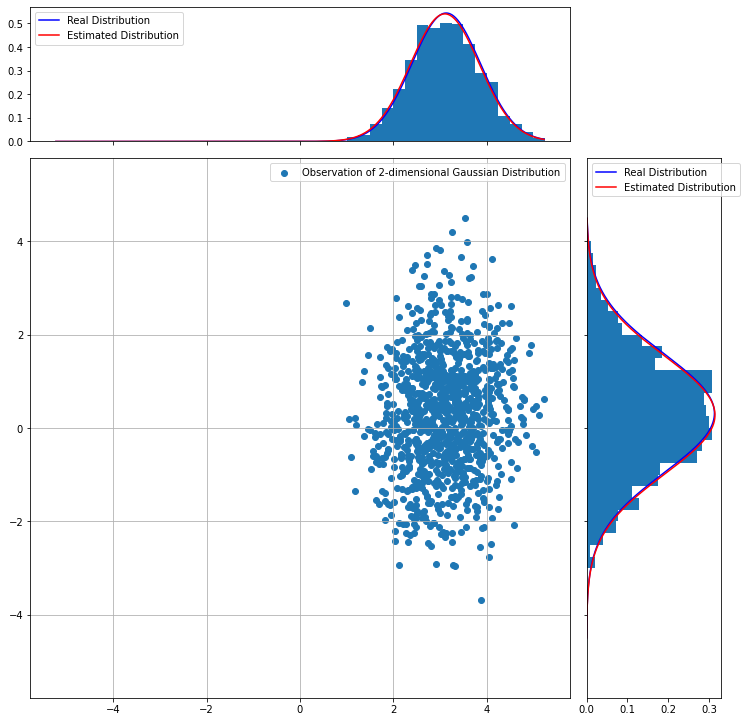

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, label='Observation of 2-dimensional Gaussian Distribution')
    ax.grid()
    ax.legend()
    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, density=True)
    ax_histy.hist(y, bins=bins, orientation='horizontal', density=True)

    
    x_histx = np.linspace(np.max(np.abs(x)) * -1, np.max(np.abs(x)), 1000)
    
    mean_real_histx, std_real_histx = real_mean[0], np.sqrt(covariance[0][0])
    mean_esti_histx, std_esti_histx = mean_hat[0], np.sqrt(covariance_hat[0][0])

    y_real_histx = norm.pdf(x_histx, loc=mean_real_histx, scale=std_real_histx)
    y_esti_histx = norm.pdf(x_histx, loc=mean_esti_histx, scale=std_esti_histx)

    ax_histx.plot(x_histx, y_real_histx, 'b', label='Real Distribution')
    ax_histx.plot(x_histx, y_esti_histx, 'r', label='Estimated Distribution')
    ax_histx.legend()

    x_histy = np.linspace(np.max(np.abs(y)) * -1, np.max(np.abs(y)), 1000)
    mean_real_histy, std_real_histy = real_mean[1], np.sqrt(covariance[1][1])
    mean_esti_histy, std_esti_histy = mean_hat[1], np.sqrt(covariance_hat[1][1])

    y_real_histy = norm.pdf(x_histy, loc=mean_real_histy, scale=std_real_histy)
    y_esti_histy = norm.pdf(x_histy, loc=mean_esti_histy, scale=std_esti_histy)

    ax_histy.plot(y_real_histy, x_histy, 'b', label='Real Distribution')
    ax_histy.plot(y_esti_histy, x_histy, 'r', label='Estimated Distribution')
    ax_histy.legend(loc='best')
    
x = gaussian_signals[:, 0]
y = gaussian_signals[:, 1]

# Start with a square Figure.
fig = plt.figure(figsize=(12, 12))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# ax.grid(False)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

# fig.savefig('../Pic/ML_Estimation.jpg', dpi=300)
